# Car Price Prediction project

## Load of libraries

In [1]:
import pandas as pd
import numpy as np
import json
import ast
import re

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

# 📜 About this dataset
## Feature description
### New Car Details
+ **it**: Ignition type
+ **ft**: Fuel type (e.g., Petrol)
+ **bt**: Body type (e.g., Hatchback)
+ **km**: Kilometers driven
+ **transmission**: Transmission type (e.g., Manual)
+ **ownerNo**: Number of previous owners
+ **owner**: Ownership details
+ **oem**: Original Equipment Manufacturer (e.g., Maruti)
+ **model**: Car model (e.g., Maruti Celerio)
+ **modelYear**: Year of car manufacture
+ **centralVariantId**: Central variant ID
+ **variantName**: Variant name
+ **price**: Price of the used car.
+ **priceActual**: Actual price (if available)
+ **priceSaving**: Price saving information (if available).
+ **priceFixedText**: Fixed price details.
+ **trendingText**: Trending car information.
### Car Overview
+ **heading**: Car overview heading.
+ **top**: Top details, including keys like registration year, insurance validity, fuel type, etc.
+ **bottomData**: Additional bottom data (currently not available).
### New Car Feature
+ **heading**: Features heading.
+ **top**: Top features.
+ **data**: Detailed feature information categorized by comfort, interior, exterior, safety, etc.
### New Car Specs
+ **heading**: Specifications heading.
+ **top**: Top specifications like mileage, engine, max power, torque, etc.
+ **data**: Detailed engine and transmission information, dimensions, capacity, and miscellaneous details.

# Data Processing
### Convert unstructured data  into a structured format
### Chennai_Cars_dataset

In [2]:
df = pd.read_excel(r'D:\Education\Project\Sachin\Car price prediction\Data set\Unstructured data\chennai_cars.xlsx')
df

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Minivans', 'k...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Low...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
...,...,...,...,...,...
1414,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1415,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1416,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1417,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...


**new_car_detail column**

**convert a nested dictionary into a flat dictionary using flatten_dict function **

In [3]:
def flatten_dict(d):

    flat_dict = {}
    for key, value in d.items():
        if isinstance(value, dict):
            for sub_key, sub_value in flatten_dict(value).items():
                flat_dict[f"{key}_{sub_key}"] = sub_value
        else:
            flat_dict[key] = value
    return flat_dict

In [4]:
columns_to_flatten = ['new_car_detail']

In [5]:
for col in columns_to_flatten:
    if col in df.columns:
        # Convert rows from JSON-like to dictionary for each column
        flattened_column = pd.DataFrame([flatten_dict(eval(row)) for row in df[col].dropna()])

        # Rename columns to prevent conflict
        flattened_column.columns = [f"{c}" for c in flattened_column.columns]

        # Concatenate flattened data with original dataframe
        df = pd.concat([df, flattened_column], axis=1)
        
# Drop the original JSON-like columns as they are now expanded
new_car_detail = df.drop(columns=columns_to_flatten)

**new_car_overview column**

**Take key as a column name & value as a its value **

In [6]:
def extract_key_value_safe(data):
    try:
        data_dict = ast.literal_eval(data)
        
        key_value_dict = {}
        for item in data_dict.get('top', []):
            key = item.get('key', '') 
            value = item.get('value', '')  
            if key:
                key_value_dict[key] = value
        
        return key_value_dict
    
    except (ValueError, SyntaxError):
        
        return {}

In [7]:
df_overview = new_car_detail['new_car_overview'].apply(extract_key_value_safe).apply(pd.Series)

In [8]:
new_car_overview = pd.concat([df_overview, new_car_detail], axis=1)

**new_car_specs column**

**Take key as a column name & value as a its value in different section . **


In [9]:
def parse_column(data_column):
    return data_column.apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else {})

In [10]:
df['new_car_specs'] = parse_column(df['new_car_specs'])

In [11]:
def extract_specs(row):
    specs = {}
    
    if 'top' in row:
        for item in row['top']:
            key = item.get('key', '').strip() if isinstance(item.get('key'), str) else item.get('key', '')
            value = item.get('value', '').strip() if isinstance(item.get('value'), str) else item.get('value', '')
            specs[key] = value
    
    if 'data' in row:
        for section in row['data']:
            for item in section.get('list', []):
                key = item.get('key', '').strip() if isinstance(item.get('key'), str) else item.get('key', '')
                value = item.get('value', '').strip() if isinstance(item.get('value'), str) else item.get('value', '')
                specs[key] = value
    
    return specs

In [12]:
df_specs = df['new_car_specs'].apply(extract_specs).apply(pd.Series, dtype='object')

In [13]:
new_car_specs = pd.concat([new_car_overview, df_specs], axis=1)

**new_car_feature column**

**Count the values and stored in that heading . **


In [14]:
def parse_column(data_column):
    return data_column.apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else {})

In [15]:
df['new_car_feature'] = parse_column(df['new_car_feature'])

In [16]:
def count_features_top(row):
    if 'top' in row:
        return len(row['top'])  # Count the number of features
    return 0

In [17]:
def count_features_data(row):
    counts = {}
    if 'data' in row:
        for category in row['data']:
            heading = category.get('heading', '').strip()  
            feature_list = category.get('list', [])  
            counts[heading] = len(feature_list) 
    return counts

In [18]:
df['features'] = df['new_car_feature'].apply(count_features_top)

In [19]:
feature_counts_df = df['new_car_feature'].apply(count_features_data).apply(pd.Series).fillna(0)
feature_counts_df = feature_counts_df.astype(int)

C:\Users\Theri Jeeva\AppData\Local\Temp\ipykernel_24976\3915894312.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  feature_counts_df = df['new_car_feature'].apply(count_features_data).apply(pd.Series).fillna(0)
C:\Users\Theri Jeeva\AppData\Local\Temp\ipykernel_24976\3915894312.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  feature_counts_df = df['new_car_feature'].apply(count_features_data).apply(pd.Series).fillna(0)
C:\Users\Theri Jeeva\AppData\Local\Temp\ipykernel_24976\3915894312.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  feature_counts_df = df['new_car_feature'].apply(count_features_data).apply(pd.Series).fillna(0)
C:\U

In [20]:
new_car_features = pd.concat([new_car_specs, feature_counts_df], axis=1)

**Add new column for city . **


In [21]:
new_car_features['City'] = 'Chennai'

In [22]:
 chennai = new_car_features.drop(columns = [ 'new_car_overview', 'new_car_feature', 'new_car_specs', 'car_links'])

In [23]:
chennai.to_csv(r'D:\Education\Project\Sachin\Car price prediction\Data set\Structured data\chennai_cars.csv', index=False)

****
### Bangalore_Cars_dataset

In [24]:
df = pd.read_excel(r'D:\Education\Project\Sachin\Car price prediction\Data set\Unstructured data\bangalore_cars.xlsx')
df

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
...,...,...,...,...,...
1476,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1477,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1478,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1479,"{'it': 0, 'ft': 'Diesel', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...


**new_car_detail column**

**convert a nested dictionary into a flat dictionary using flatten_dict function **

In [25]:
def flatten_dict(d):

    flat_dict = {}
    for key, value in d.items():
        if isinstance(value, dict):
            for sub_key, sub_value in flatten_dict(value).items():
                flat_dict[f"{key}_{sub_key}"] = sub_value
        else:
            flat_dict[key] = value
    return flat_dict

In [26]:
columns_to_flatten = ['new_car_detail']

In [27]:
for col in columns_to_flatten:
    if col in df.columns:
        flattened_column = pd.DataFrame([flatten_dict(eval(row)) for row in df[col].dropna()])
        
        flattened_column.columns = [f"{c}" for c in flattened_column.columns]
        
        df = pd.concat([df, flattened_column], axis=1)
        
new_car_details = df.drop(columns=columns_to_flatten)

**new_car_overview column**

**Take key as a column name & value as a its value **

In [28]:
def extract_key_value_safe(data):
    try:
        data_dict = ast.literal_eval(data)
        
        key_value_dict = {}
        for item in data_dict.get('top', []):
            key = item.get('key', '')  
            value = item.get('value', '')  
            if key:
                key_value_dict[key] = value
        
        return key_value_dict
    
    except (ValueError, SyntaxError):
        return {}

In [29]:
df_overview = new_car_details['new_car_overview'].apply(extract_key_value_safe).apply(pd.Series)

In [30]:
new_car_overview = pd.concat([df_overview, new_car_details], axis=1)

**new_car_specs column**

**Take key as a column name & value as a its value in different section . **

In [31]:
def parse_column(data_column):
    return data_column.apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else {})

In [32]:
df['new_car_specs'] = parse_column(df['new_car_specs'])

In [33]:
def extract_specs(row):
    specs = {}
    
    if 'top' in row:
        for item in row['top']:
            key = item.get('key', '').strip() if isinstance(item.get('key'), str) else item.get('key', '')
            value = item.get('value', '').strip() if isinstance(item.get('value'), str) else item.get('value', '')
            specs[key] = value
    
    if 'data' in row:
        for section in row['data']:
            for item in section.get('list', []):
                key = item.get('key', '').strip() if isinstance(item.get('key'), str) else item.get('key', '')
                value = item.get('value', '').strip() if isinstance(item.get('value'), str) else item.get('value', '')
                specs[key] = value
    
    return specs

In [34]:
df_specs = df['new_car_specs'].apply(extract_specs).apply(pd.Series, dtype='object')

In [35]:
new_car_specs = pd.concat([new_car_overview, df_specs], axis=1)

**new_car_feature column**

**Count the values and stored in that heading . **

In [36]:
def parse_column(data_column):
    return data_column.apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else {})

In [37]:
df['new_car_feature'] = parse_column(df['new_car_feature'])

In [38]:
def count_features_top(row):
    if 'top' in row:
        return len(row['top']) 
    return 0

In [39]:
def count_features_data(row):
    counts = {}
    if 'data' in row:
        for category in row['data']:
            heading = category.get('heading', '').strip()  
            feature_list = category.get('list', [])  
            counts[heading] = len(feature_list)  
    return counts

In [40]:
df['features'] = df['new_car_feature'].apply(count_features_top)

In [41]:
feature_counts_df = df['new_car_feature'].apply(count_features_data).apply(pd.Series).fillna(0)
feature_counts_df = feature_counts_df.astype(int)

C:\Users\Theri Jeeva\AppData\Local\Temp\ipykernel_24976\3915894312.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  feature_counts_df = df['new_car_feature'].apply(count_features_data).apply(pd.Series).fillna(0)
C:\Users\Theri Jeeva\AppData\Local\Temp\ipykernel_24976\3915894312.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  feature_counts_df = df['new_car_feature'].apply(count_features_data).apply(pd.Series).fillna(0)
C:\Users\Theri Jeeva\AppData\Local\Temp\ipykernel_24976\3915894312.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  feature_counts_df = df['new_car_feature'].apply(count_features_data).apply(pd.Series).fillna(0)
C:\U

In [42]:
new_car_features = pd.concat([new_car_specs, feature_counts_df], axis=1)

**Add new column for city . **

In [43]:
new_car_features['City'] = 'Bangalore'

In [44]:
bangalore = new_car_features.drop(columns = [ 'new_car_overview', 'new_car_feature', 'new_car_specs', 'car_links'])

In [45]:
bangalore.to_csv(r'D:\Education\Project\Sachin\Car price prediction\Data set\Structured data\bangalore_cars.csv', index=False)

****
### Delhi_Cars_dataset

In [46]:
df = pd.read_excel(r'D:\Education\Project\Sachin\Car price prediction\Data set\Unstructured data\delhi_cars.xlsx')

**new_car_detail column**

 **convert a nested dictionary into a flat dictionary using flatten_dict function **

In [47]:
def flatten_dict(d):

    flat_dict = {}
    for key, value in d.items():
        if isinstance(value, dict):
            for sub_key, sub_value in flatten_dict(value).items():
                flat_dict[f"{key}_{sub_key}"] = sub_value
        else:
            flat_dict[key] = value
    return flat_dict

In [48]:
columns_to_flatten = ['new_car_detail']

In [49]:
for col in columns_to_flatten:
    if col in df.columns:
        flattened_column = pd.DataFrame([flatten_dict(eval(row)) for row in df[col].dropna()])

        flattened_column.columns = [f"{c}" for c in flattened_column.columns]

        df = pd.concat([df, flattened_column], axis=1)
        
new_car_details = df.drop(columns=columns_to_flatten)

**new_car_overview column**

**Take key as a column name & value as a its value **

In [50]:
def extract_key_value_safe(data):
    try:
        data_dict = ast.literal_eval(data)
        
        key_value_dict = {}
        for item in data_dict.get('top', []):
            key = item.get('key', '')  
            value = item.get('value', '')  
            if key:
                key_value_dict[key] = value
        
        return key_value_dict
    
    except (ValueError, SyntaxError):
        return {}

In [51]:
df_overview = new_car_details['new_car_overview'].apply(extract_key_value_safe).apply(pd.Series)

In [52]:
new_car_overview = pd.concat([df_overview, new_car_details], axis=1)

**new_car_specs column**

**Take key as a column name & value as a its value in different section . **

In [53]:
def parse_column(data_column):
    return data_column.apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else {})

In [54]:
df['new_car_specs'] = parse_column(df['new_car_specs'])

In [55]:
def extract_specs(row):
    specs = {}
    
    if 'top' in row:
        for item in row['top']:
            key = item.get('key', '').strip() if isinstance(item.get('key'), str) else item.get('key', '')
            value = item.get('value', '').strip() if isinstance(item.get('value'), str) else item.get('value', '')
            specs[key] = value
    
    if 'data' in row:
        for section in row['data']:
            for item in section.get('list', []):
                key = item.get('key', '').strip() if isinstance(item.get('key'), str) else item.get('key', '')
                value = item.get('value', '').strip() if isinstance(item.get('value'), str) else item.get('value', '')
                specs[key] = value
    
    return specs

In [56]:
df_specs = df['new_car_specs'].apply(extract_specs).apply(pd.Series, dtype='object')

In [57]:
new_car_specs = pd.concat([new_car_overview, df_specs], axis=1)

**new_car_feature column**

**Count the values and stored in that heading . **

In [58]:
def parse_column(data_column):
    return data_column.apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else {})

In [59]:
df['new_car_feature'] = parse_column(df['new_car_feature'])

In [60]:
def count_features_top(row):
    if 'top' in row:
        return len(row['top'])  
    return 0

In [61]:
def count_features_data(row):
    counts = {}
    if 'data' in row:
        for category in row['data']:
            heading = category.get('heading', '').strip()  
            feature_list = category.get('list', [])  
            counts[heading] = len(feature_list)  
    return counts

In [62]:
df['features'] = df['new_car_feature'].apply(count_features_top)

In [63]:
feature_counts_df = df['new_car_feature'].apply(count_features_data).apply(pd.Series).fillna(0)
feature_counts_df = feature_counts_df.astype(int)

C:\Users\Theri Jeeva\AppData\Local\Temp\ipykernel_24976\3915894312.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  feature_counts_df = df['new_car_feature'].apply(count_features_data).apply(pd.Series).fillna(0)
C:\Users\Theri Jeeva\AppData\Local\Temp\ipykernel_24976\3915894312.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  feature_counts_df = df['new_car_feature'].apply(count_features_data).apply(pd.Series).fillna(0)
C:\Users\Theri Jeeva\AppData\Local\Temp\ipykernel_24976\3915894312.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  feature_counts_df = df['new_car_feature'].apply(count_features_data).apply(pd.Series).fillna(0)
C:\U

In [64]:
new_car_feature = pd.concat([new_car_specs, feature_counts_df], axis=1)

**Add new column for city . **

In [65]:
new_car_features['City'] = 'Delhi'

In [66]:
delhi = new_car_features.drop(columns = [ 'new_car_overview', 'new_car_feature', 'new_car_specs', 'car_links'])

In [67]:
delhi.to_csv(r'D:\Education\Project\Sachin\Car price prediction\Data set\Structured data\delhi_cars.csv', index=False)

****
### Kolkata_Cars_dataset

In [68]:
df = pd.read_excel(r'D:\Education\Project\Sachin\Car price prediction\Data set\Unstructured data\kolkata_cars.xlsx')

**new_car_detail column**

**convert a nested dictionary into a flat dictionary using flatten_dict function**

In [69]:
def flatten_dict(d):

    flat_dict = {}
    for key, value in d.items():
        if isinstance(value, dict):
            for sub_key, sub_value in flatten_dict(value).items():
                flat_dict[f"{key}_{sub_key}"] = sub_value
        else:
            flat_dict[key] = value
    return flat_dict

In [70]:
columns_to_flatten = ['new_car_detail']

In [71]:
for col in columns_to_flatten:
    if col in df.columns:
        flattened_column = pd.DataFrame([flatten_dict(eval(row)) for row in df[col].dropna()])

        flattened_column.columns = [f"{c}" for c in flattened_column.columns]

        df = pd.concat([df, flattened_column], axis=1)
        
new_car_details = df.drop(columns=columns_to_flatten)

**new_car_overview column**

**Take key as a column name & value as a its value **

In [72]:
def extract_key_value_safe(data):
    try:
        data_dict = ast.literal_eval(data)
        
        key_value_dict = {}
        for item in data_dict.get('top', []):
            key = item.get('key', '')  
            value = item.get('value', '')  
            if key:
                key_value_dict[key] = value
        
        return key_value_dict
    
    except (ValueError, SyntaxError):
        return {}

In [73]:
df_overview = new_car_details['new_car_overview'].apply(extract_key_value_safe).apply(pd.Series)

In [74]:
new_car_overview = pd.concat([df_overview, new_car_details], axis=1)

**new_car_specs column**

**Take key as a column name & value as a its value in different section . **

In [75]:
def parse_column(data_column):
    return data_column.apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else {})

In [76]:
df['new_car_specs'] = parse_column(df['new_car_specs'])

In [77]:
def extract_specs(row):
    specs = {}
    
    if 'top' in row:
        for item in row['top']:
            key = item.get('key', '').strip() if isinstance(item.get('key'), str) else item.get('key', '')
            value = item.get('value', '').strip() if isinstance(item.get('value'), str) else item.get('value', '')
            specs[key] = value
    
    if 'data' in row:
        for section in row['data']:
            for item in section.get('list', []):
                key = item.get('key', '').strip() if isinstance(item.get('key'), str) else item.get('key', '')
                value = item.get('value', '').strip() if isinstance(item.get('value'), str) else item.get('value', '')
                specs[key] = value
    
    return specs

In [78]:
df_specs = df['new_car_specs'].apply(extract_specs).apply(pd.Series, dtype='object')

In [79]:
new_car_specs = pd.concat([new_car_overview, df_specs], axis=1)

**new_car_feature column**

**Count the values and stored in that heading . **

In [80]:
def parse_column(data_column):
    return data_column.apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else {})

In [81]:
df['new_car_feature'] = parse_column(df['new_car_feature'])

In [82]:
def count_features_top(row):
    if 'top' in row:
        return len(row['top'])  
    return 0

In [83]:
def count_features_data(row):
    counts = {}
    if 'data' in row:
        for category in row['data']:
            heading = category.get('heading', '').strip()  
            feature_list = category.get('list', []) 
            counts[heading] = len(feature_list)  
    return counts

In [84]:
df['features'] = df['new_car_feature'].apply(count_features_top)

In [85]:
feature_counts_df = df['new_car_feature'].apply(count_features_data).apply(pd.Series).fillna(0)
feature_counts_df = feature_counts_df.astype(int)

C:\Users\Theri Jeeva\AppData\Local\Temp\ipykernel_24976\3915894312.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  feature_counts_df = df['new_car_feature'].apply(count_features_data).apply(pd.Series).fillna(0)
C:\Users\Theri Jeeva\AppData\Local\Temp\ipykernel_24976\3915894312.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  feature_counts_df = df['new_car_feature'].apply(count_features_data).apply(pd.Series).fillna(0)
C:\Users\Theri Jeeva\AppData\Local\Temp\ipykernel_24976\3915894312.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  feature_counts_df = df['new_car_feature'].apply(count_features_data).apply(pd.Series).fillna(0)
C:\U

In [86]:
new_car_feature = pd.concat([new_car_specs, feature_counts_df], axis=1)

**Add new column for city . **

In [87]:
new_car_features['City'] = 'Kolkata'

In [88]:
kolkata = new_car_features.drop(columns = [ 'new_car_overview', 'new_car_feature', 'new_car_specs', 'car_links'])

In [89]:
kolkata.to_csv(r'D:\Education\Project\Sachin\Car price prediction\Data set\Structured data\kolkata_cars.csv', index=False)

****
### Jaipur_Cars_dataset

In [90]:
df = pd.read_excel(r'D:\Education\Project\Sachin\Car price prediction\Data set\Unstructured data\jaipur_cars.xlsx')

**new_car_detail column**

**convert a nested dictionary into a flat dictionary using flatten_dict function**

In [91]:
def flatten_dict(d):

    flat_dict = {}
    for key, value in d.items():
        if isinstance(value, dict):
            for sub_key, sub_value in flatten_dict(value).items():
                flat_dict[f"{key}_{sub_key}"] = sub_value
        else:
            flat_dict[key] = value
    return flat_dict

In [92]:
columns_to_flatten = ['new_car_detail']

In [93]:
for col in columns_to_flatten:
    if col in df.columns:
        flattened_column = pd.DataFrame([flatten_dict(eval(row)) for row in df[col].dropna()])

        flattened_column.columns = [f"{c}" for c in flattened_column.columns]

        df = pd.concat([df, flattened_column], axis=1)
        
new_car_details = df.drop(columns=columns_to_flatten)

**new_car_overview column**

**Take key as a column name & value as a its value **

In [94]:
def extract_key_value_safe(data):
    try:
        data_dict = ast.literal_eval(data)
        
        key_value_dict = {}
        for item in data_dict.get('top', []):
            key = item.get('key', '')  
            value = item.get('value', '')  
            if key:
                key_value_dict[key] = value
        
        return key_value_dict
    
    except (ValueError, SyntaxError):
        return {}

In [95]:
df_overview = new_car_details['new_car_overview'].apply(extract_key_value_safe).apply(pd.Series)

In [96]:
new_car_overview = pd.concat([df_overview, new_car_details], axis=1)

**new_car_specs column**

**Take key as a column name & value as a its value in different section . **

In [97]:
def parse_column(data_column):
    return data_column.apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else {})

In [98]:
df['new_car_specs'] = parse_column(df['new_car_specs'])

In [99]:
def extract_specs(row):
    specs = {}
    
    if 'top' in row:
        for item in row['top']:
            key = item.get('key', '').strip() if isinstance(item.get('key'), str) else item.get('key', '')
            value = item.get('value', '').strip() if isinstance(item.get('value'), str) else item.get('value', '')
            specs[key] = value
    
    if 'data' in row:
        for section in row['data']:
            for item in section.get('list', []):
                key = item.get('key', '').strip() if isinstance(item.get('key'), str) else item.get('key', '')
                value = item.get('value', '').strip() if isinstance(item.get('value'), str) else item.get('value', '')
                specs[key] = value
    
    return specs

In [100]:
df_specs = df['new_car_specs'].apply(extract_specs).apply(pd.Series, dtype='object')

In [101]:
new_car_specs = pd.concat([new_car_overview, df_specs], axis=1)

**new_car_feature column**

**Count the values and stored in that heading . **

In [102]:
def parse_column(data_column):
    return data_column.apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else {})

In [103]:
df['new_car_feature'] = parse_column(df['new_car_feature'])

In [104]:
def count_features_top(row):
    if 'top' in row:
        return len(row['top']) 
    return 0

In [105]:
def count_features_data(row):
    counts = {}
    if 'data' in row:
        for category in row['data']:
            heading = category.get('heading', '').strip()  
            feature_list = category.get('list', [])  
            counts[heading] = len(feature_list)  
    return counts

In [106]:
df['features'] = df['new_car_feature'].apply(count_features_top)

In [107]:
feature_counts_df = df['new_car_feature'].apply(count_features_data).apply(pd.Series).fillna(0)
feature_counts_df = feature_counts_df.astype(int)

C:\Users\Theri Jeeva\AppData\Local\Temp\ipykernel_24976\3915894312.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  feature_counts_df = df['new_car_feature'].apply(count_features_data).apply(pd.Series).fillna(0)
C:\Users\Theri Jeeva\AppData\Local\Temp\ipykernel_24976\3915894312.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  feature_counts_df = df['new_car_feature'].apply(count_features_data).apply(pd.Series).fillna(0)
C:\Users\Theri Jeeva\AppData\Local\Temp\ipykernel_24976\3915894312.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  feature_counts_df = df['new_car_feature'].apply(count_features_data).apply(pd.Series).fillna(0)
C:\U

In [108]:
new_car_feature = pd.concat([new_car_specs, feature_counts_df], axis=1)

**Add new column for city . **


In [109]:
new_car_features['City'] = 'Jaipur'

In [110]:
jaipur = new_car_features.drop(columns = [ 'new_car_overview', 'new_car_feature', 'new_car_specs', 'car_links'])

In [111]:
jaipur.to_csv(r'D:\Education\Project\Sachin\Car price prediction\Data set\Structured data\jaipur_cars.csv', index=False)

****
### Hyderabad_Cars_dataset


In [112]:
df = pd.read_excel(r'D:\Education\Project\Sachin\Car price prediction\Data set\Unstructured data\hyderabad_cars.xlsx')

**new_car_detail column**

**convert a nested dictionary into a flat dictionary using flatten_dict function **

In [113]:
def flatten_dict(d):

    flat_dict = {}
    for key, value in d.items():
        if isinstance(value, dict):
            for sub_key, sub_value in flatten_dict(value).items():
                flat_dict[f"{key}_{sub_key}"] = sub_value
        else:
            flat_dict[key] = value
    return flat_dict

In [114]:
columns_to_flatten = ['new_car_detail']

In [115]:
for col in columns_to_flatten:
    if col in df.columns:
        flattened_column = pd.DataFrame([flatten_dict(eval(row)) for row in df[col].dropna()])

        flattened_column.columns = [f"{c}" for c in flattened_column.columns]

        df = pd.concat([df, flattened_column], axis=1)
        
new_car_details = df.drop(columns=columns_to_flatten)

**new_car_overview column**

 **Take key as a column name & value as a its value **

In [116]:
def extract_key_value_safe(data):
    try:
        data_dict = ast.literal_eval(data)
        
        key_value_dict = {}
        for item in data_dict.get('top', []):
            key = item.get('key', '')  
            value = item.get('value', '')  
            if key:
                key_value_dict[key] = value
        
        return key_value_dict
    
    except (ValueError, SyntaxError):
        return {}

In [117]:
df_overview = new_car_details['new_car_overview'].apply(extract_key_value_safe).apply(pd.Series)

In [118]:
new_car_overview = pd.concat([df_overview, new_car_details], axis=1)

**new_car_specs column**

**Take key as a column name & value as a its value in different section . **

In [119]:
def parse_column(data_column):
    return data_column.apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else {})

In [120]:
df['new_car_specs'] = parse_column(df['new_car_specs'])

In [121]:
def extract_specs(row):
    specs = {}
    
    if 'top' in row:
        for item in row['top']:
            key = item.get('key', '').strip() if isinstance(item.get('key'), str) else item.get('key', '')
            value = item.get('value', '').strip() if isinstance(item.get('value'), str) else item.get('value', '')
            specs[key] = value
    
    if 'data' in row:
        for section in row['data']:
            for item in section.get('list', []):
                key = item.get('key', '').strip() if isinstance(item.get('key'), str) else item.get('key', '')
                value = item.get('value', '').strip() if isinstance(item.get('value'), str) else item.get('value', '')
                specs[key] = value
    
    return specs

In [122]:
df_specs = df['new_car_specs'].apply(extract_specs).apply(pd.Series, dtype='object')

In [123]:
new_car_specs = pd.concat([new_car_overview, df_specs], axis=1)

**new_car_feature column**

**Count the values and stored in that heading . **

In [124]:
def parse_column(data_column):
    return data_column.apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else {})

In [125]:
df['new_car_feature'] = parse_column(df['new_car_feature'])

In [126]:
def count_features_top(row):
    if 'top' in row:
        return len(row['top'])  
    return 0

In [127]:
def count_features_data(row):
    counts = {}
    if 'data' in row:
        for category in row['data']:
            heading = category.get('heading', '').strip()  
            feature_list = category.get('list', [])  
            counts[heading] = len(feature_list) 
    return counts

In [128]:
df['features'] = df['new_car_feature'].apply(count_features_top)

In [129]:
feature_counts_df = df['new_car_feature'].apply(count_features_data).apply(pd.Series).fillna(0)
feature_counts_df = feature_counts_df.astype(int)

C:\Users\Theri Jeeva\AppData\Local\Temp\ipykernel_24976\3915894312.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  feature_counts_df = df['new_car_feature'].apply(count_features_data).apply(pd.Series).fillna(0)
C:\Users\Theri Jeeva\AppData\Local\Temp\ipykernel_24976\3915894312.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  feature_counts_df = df['new_car_feature'].apply(count_features_data).apply(pd.Series).fillna(0)
C:\Users\Theri Jeeva\AppData\Local\Temp\ipykernel_24976\3915894312.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  feature_counts_df = df['new_car_feature'].apply(count_features_data).apply(pd.Series).fillna(0)
C:\U

In [130]:
new_car_feature = pd.concat([new_car_specs, feature_counts_df], axis=1)

**Add new column for city . **

In [131]:
new_car_features['City'] = 'Hyderabad'

In [132]:
hyderabad = new_car_features.drop(columns = [ 'new_car_overview', 'new_car_feature', 'new_car_specs', 'car_links'])

In [133]:
hyderabad.to_csv(r'D:\Education\Project\Sachin\Car price prediction\Data set\Structured data\hyderabad_cars.csv', index=False)

**Concatenate all datasets and make it as a single dataset. **

In [134]:
csv_files = ['chennai_cars.csv', 'bangalore_cars.csv', 'delhi_cars.csv', 'hyderabad_cars.csv' , 'jaipur_cars.csv', 'kolkata_cars.csv'] 

In [135]:
dfs = [pd.read_csv(file) for file in csv_files]

In [136]:
car_prices_prediction_dataset = pd.concat(dfs, ignore_index=True)

In [137]:
car_prices_prediction_dataset.to_csv(r'D:\Education\Project\Sachin\Car price prediction\Data set\car_prices_prediction_dataset.csv', index=False)

In [138]:
cp = car_prices_prediction_dataset
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 75 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Registration Year              8317 non-null   object 
 1   Insurance Validity             8365 non-null   object 
 2   Fuel Type                      8369 non-null   object 
 3   Seats                          8363 non-null   object 
 4   Kms Driven                     8367 non-null   object 
 5   RTO                            7475 non-null   object 
 6   Ownership                      8337 non-null   object 
 7   Engine Displacement            8365 non-null   object 
 8   Transmission                   8369 non-null   object 
 9   Year of Manufacture            8349 non-null   float64
 10  it                             8369 non-null   int64  
 11  ft                             8369 non-null   object 
 12  bt                             8365 non-null   o

**Taking 14 attributes for model**

In [139]:
cpd = cp[['oem', 'model', 'Transmission', 'Year of Manufacture', 'modelYear', 'Gear Box', 'City', 'Insurance Validity', 'ownerNo', 'Fuel Type',
         'Kms Driven', 'bt', 'Mileage', 'price']]

In [140]:
cpd.drop_duplicates()

,oem,model,Transmission,Year of Manufacture,modelYear,Gear Box,City,Insurance Validity,ownerNo,Fuel Type,Kms Driven,bt,Mileage,price
0,Kia,Kia Sonet,Automatic,2022.0,2022,7-Speed DCT,Chennai,Third Party insurance,1,Petrol,"20,000 Kms",SUV,NaN,₹ 11.50 Lakh
1,Maruti,Maruti Eeco,Manual,2015.0,2015,5 Speed,Chennai,Comprehensive,1,Petrol,"20,687 Kms",Minivans,15.37 kmpl,₹ 4.15 Lakh
2,Nissan,Nissan Magnite,Manual,2021.0,2021,5 Speed,Chennai,Third Party insurance,1,Petrol,"30,000 Kms",SUV,20 kmpl,₹ 7.50 Lakh
3,Hyundai,Hyundai i10,Manual,2015.0,2015,5 Speed,Chennai,Comprehensive,1,Petrol,"59,247 Kms",Hatchback,19.81 kmpl,₹ 3.98 Lakh
4,Honda,Honda Jazz,Manual,2015.0,2015,5 Speed,Chennai,Third Party insurance,1,Petrol,"50,000 Kms",Hatchback,18.7 kmpl,₹ 5.50 Lakh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Maruti,Maruti Celerio,Manual,2022.0,2022,5-Speed,Kolkata,Third Party insurance,1,Petrol,"10,000 Kms",Hatchback,25.24 kmpl,₹ 5.10 Lakh
8365,Maruti,Maruti Alto 800,Manual,2014.0,2014,5 Speed,Kolkata,Third Party insurance,1,Petrol,"1,20,000 Kms",Hatchback,22.74 kmpl,₹ 1.80 Lakh
8366,Mercedes-Benz,Mercedes-Benz C-Class,Automatic,2011.0,2011,7 Speed,Kolkata,Third Party insurance,3,Petrol,"50,000 Kms",Sedan,11.74 kmpl,₹ 5.50 Lakh
8367,Maruti,Maruti Ritz,Manual,2012.0,2012,5 Speed,Kolkata,Third Party insurance,1,Petrol,"40,000 Kms",Hatchback,18.5 kmpl,₹ 1.40 Lakh


In [141]:
cpd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   oem                  8369 non-null   object 
 1   model                8369 non-null   object 
 2   Transmission         8369 non-null   object 
 3   Year of Manufacture  8349 non-null   float64
 4   modelYear            8369 non-null   int64  
 5   Gear Box             8263 non-null   object 
 6   City                 8369 non-null   object 
 7   Insurance Validity   8365 non-null   object 
 8   ownerNo              8369 non-null   int64  
 9   Fuel Type            8369 non-null   object 
 10  Kms Driven           8367 non-null   object 
 11  bt                   8365 non-null   object 
 12  Mileage              8082 non-null   object 
 13  price                8369 non-null   object 
dtypes: float64(1), int64(2), object(11)
memory usage: 915.5+ KB


In [142]:
cpd.isna().all()

oem                    False
model                  False
Transmission           False
Year of Manufacture    False
modelYear              False
Gear Box               False
City                   False
Insurance Validity     False
ownerNo                False
Fuel Type              False
Kms Driven             False
bt                     False
Mileage                False
price                  False
dtype: bool

In [143]:
cpd.drop_duplicates()

,oem,model,Transmission,Year of Manufacture,modelYear,Gear Box,City,Insurance Validity,ownerNo,Fuel Type,Kms Driven,bt,Mileage,price
0,Kia,Kia Sonet,Automatic,2022.0,2022,7-Speed DCT,Chennai,Third Party insurance,1,Petrol,"20,000 Kms",SUV,NaN,₹ 11.50 Lakh
1,Maruti,Maruti Eeco,Manual,2015.0,2015,5 Speed,Chennai,Comprehensive,1,Petrol,"20,687 Kms",Minivans,15.37 kmpl,₹ 4.15 Lakh
2,Nissan,Nissan Magnite,Manual,2021.0,2021,5 Speed,Chennai,Third Party insurance,1,Petrol,"30,000 Kms",SUV,20 kmpl,₹ 7.50 Lakh
3,Hyundai,Hyundai i10,Manual,2015.0,2015,5 Speed,Chennai,Comprehensive,1,Petrol,"59,247 Kms",Hatchback,19.81 kmpl,₹ 3.98 Lakh
4,Honda,Honda Jazz,Manual,2015.0,2015,5 Speed,Chennai,Third Party insurance,1,Petrol,"50,000 Kms",Hatchback,18.7 kmpl,₹ 5.50 Lakh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Maruti,Maruti Celerio,Manual,2022.0,2022,5-Speed,Kolkata,Third Party insurance,1,Petrol,"10,000 Kms",Hatchback,25.24 kmpl,₹ 5.10 Lakh
8365,Maruti,Maruti Alto 800,Manual,2014.0,2014,5 Speed,Kolkata,Third Party insurance,1,Petrol,"1,20,000 Kms",Hatchback,22.74 kmpl,₹ 1.80 Lakh
8366,Mercedes-Benz,Mercedes-Benz C-Class,Automatic,2011.0,2011,7 Speed,Kolkata,Third Party insurance,3,Petrol,"50,000 Kms",Sedan,11.74 kmpl,₹ 5.50 Lakh
8367,Maruti,Maruti Ritz,Manual,2012.0,2012,5 Speed,Kolkata,Third Party insurance,1,Petrol,"40,000 Kms",Hatchback,18.5 kmpl,₹ 1.40 Lakh


In [144]:
cpd = cpd.dropna()

In [145]:
cpd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7999 entries, 1 to 8368
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   oem                  7999 non-null   object 
 1   model                7999 non-null   object 
 2   Transmission         7999 non-null   object 
 3   Year of Manufacture  7999 non-null   float64
 4   modelYear            7999 non-null   int64  
 5   Gear Box             7999 non-null   object 
 6   City                 7999 non-null   object 
 7   Insurance Validity   7999 non-null   object 
 8   ownerNo              7999 non-null   int64  
 9   Fuel Type            7999 non-null   object 
 10  Kms Driven           7999 non-null   object 
 11  bt                   7999 non-null   object 
 12  Mileage              7999 non-null   object 
 13  price                7999 non-null   object 
dtypes: float64(1), int64(2), object(11)
memory usage: 937.4+ KB


**Standardising Data Formats**

In [146]:
def extract_number(text):
    if isinstance(text, str):
        match = re.findall(r"[-+]?\d*\.\d+|\d+", text.replace(",", ""))
        return float(match[0]) if match else None
    return text

cpd['Kms Driven'] = cpd['Kms Driven'].apply(extract_number)
cpd['Mileage'] = cpd['Mileage'].apply(extract_number)
cpd['Gear Box'] = cpd['Gear Box'].apply(extract_number)
cpd['Gear Box'] = cpd['Gear Box'].astype('Int64')

In [147]:
def convert_price(price):
    if isinstance(price, str):
        price = price.replace('₹', '').replace(',', '').strip()  

        if 'Lakh' in price:
            price = price.replace('Lakh', '').strip()  
            return float(price) * 100000  
#         elif 'Crore' in price:
#             price = price.replace('Crore', '').strip()  
#             return float(price) * 10000000  

    try:
        return float(price)
    except ValueError:
        return None  

cpd['price'] = cpd['price'].apply(convert_price)


In [148]:
 cpd

,oem,model,Transmission,Year of Manufacture,modelYear,Gear Box,City,Insurance Validity,ownerNo,Fuel Type,Kms Driven,bt,Mileage,price
1,Maruti,Maruti Eeco,Manual,2015.0,2015,5,Chennai,Comprehensive,1,Petrol,20687.0,Minivans,15.37,415000.0
2,Nissan,Nissan Magnite,Manual,2021.0,2021,5,Chennai,Third Party insurance,1,Petrol,30000.0,SUV,20.00,750000.0
3,Hyundai,Hyundai i10,Manual,2015.0,2015,5,Chennai,Comprehensive,1,Petrol,59247.0,Hatchback,19.81,398000.0
4,Honda,Honda Jazz,Manual,2015.0,2015,5,Chennai,Third Party insurance,1,Petrol,50000.0,Hatchback,18.70,550000.0
5,Mercedes-Benz,Mercedes-Benz E-Class,Automatic,2016.0,2016,7,Chennai,Comprehensive,1,Diesel,20000.0,Sedan,13.00,3300000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Maruti,Maruti Celerio,Manual,2022.0,2022,5,Kolkata,Third Party insurance,1,Petrol,10000.0,Hatchback,25.24,510000.0
8365,Maruti,Maruti Alto 800,Manual,2014.0,2014,5,Kolkata,Third Party insurance,1,Petrol,120000.0,Hatchback,22.74,180000.0
8366,Mercedes-Benz,Mercedes-Benz C-Class,Automatic,2011.0,2011,7,Kolkata,Third Party insurance,3,Petrol,50000.0,Sedan,11.74,550000.0
8367,Maruti,Maruti Ritz,Manual,2012.0,2012,5,Kolkata,Third Party insurance,1,Petrol,40000.0,Hatchback,18.50,140000.0


In [149]:
cpd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7999 entries, 1 to 8368
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   oem                  7999 non-null   object 
 1   model                7999 non-null   object 
 2   Transmission         7999 non-null   object 
 3   Year of Manufacture  7999 non-null   float64
 4   modelYear            7999 non-null   int64  
 5   Gear Box             7794 non-null   Int64  
 6   City                 7999 non-null   object 
 7   Insurance Validity   7999 non-null   object 
 8   ownerNo              7999 non-null   int64  
 9   Fuel Type            7999 non-null   object 
 10  Kms Driven           7999 non-null   float64
 11  bt                   7999 non-null   object 
 12  Mileage              7999 non-null   float64
 13  price                7985 non-null   float64
dtypes: Int64(1), float64(4), int64(2), object(7)
memory usage: 945.2+ KB


In [150]:
cpd['price'].fillna(cpd['price'].mode()[0], inplace=True)

In [151]:
cpd['Gear Box'].fillna(cpd['Gear Box'].mode()[0], inplace=True)


In [152]:
cpd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7999 entries, 1 to 8368
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   oem                  7999 non-null   object 
 1   model                7999 non-null   object 
 2   Transmission         7999 non-null   object 
 3   Year of Manufacture  7999 non-null   float64
 4   modelYear            7999 non-null   int64  
 5   Gear Box             7999 non-null   Int64  
 6   City                 7999 non-null   object 
 7   Insurance Validity   7999 non-null   object 
 8   ownerNo              7999 non-null   int64  
 9   Fuel Type            7999 non-null   object 
 10  Kms Driven           7999 non-null   float64
 11  bt                   7999 non-null   object 
 12  Mileage              7999 non-null   float64
 13  price                7999 non-null   float64
dtypes: Int64(1), float64(4), int64(2), object(7)
memory usage: 945.2+ KB


 ****
# Exploratory Data Analysis (EDA)

### 📈 Data Visualizations:

### Scatter plot

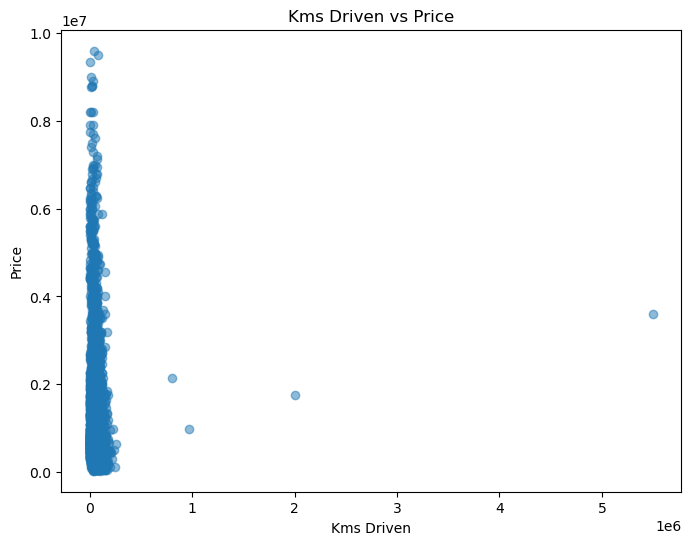

In [153]:
plt.figure(figsize=(8, 6))
plt.scatter(cpd['Kms Driven'], cpd['price'], alpha=0.5)
plt.title('Kms Driven vs Price')
plt.xlabel('Kms Driven')
plt.ylabel('Price')
plt.show()

### Histogram plot

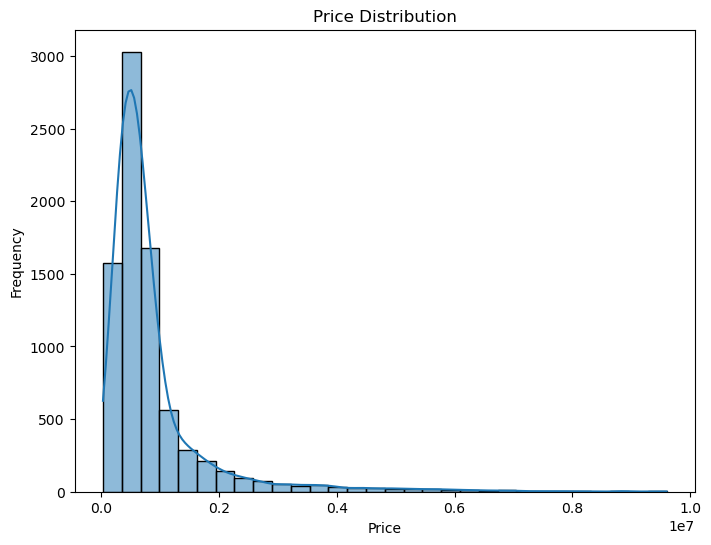

In [154]:
plt.figure(figsize=(8,6))
sns.histplot(cpd['price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### Box Plot

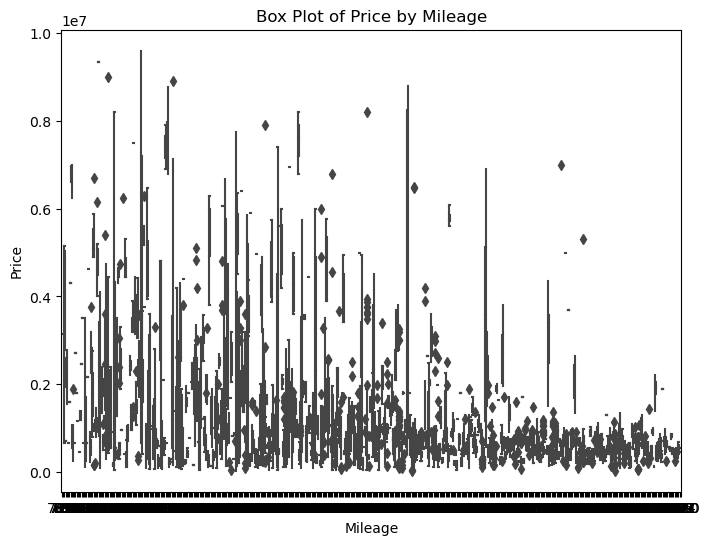

In [155]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Mileage', y='price', data= cpd)
plt.title('Box Plot of Price by Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

### Heatmap

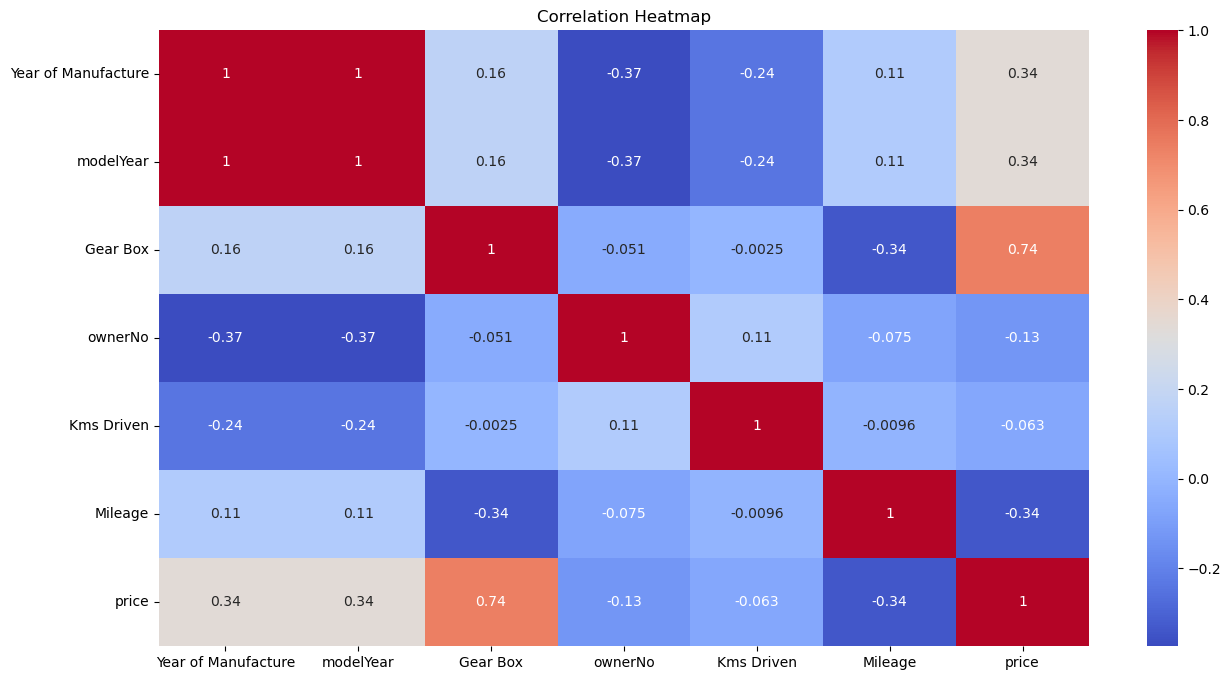

In [156]:
plt.figure(figsize=(15, 8))
sns.heatmap(cpd.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

****

# 🔢 Features encoding

In [157]:
nominal_columns = ['oem', 'model', 'Transmission', 'City', 'Insurance Validity', 'Fuel Type', 'bt']

## One-hot encoding

In [158]:
encoded_data = pd.get_dummies(cpd, columns=nominal_columns, drop_first=True)
encoded_data.head()

,Year of Manufacture,modelYear,Gear Box,ownerNo,Kms Driven,Mileage,price,oem_BMW,oem_Chevrolet,oem_Citroen,...,Fuel Type_Petrol,bt_Coupe,bt_Hatchback,bt_Hybrids,bt_MUV,bt_Minivans,bt_Pickup Trucks,bt_SUV,bt_Sedan,bt_Wagon
1,2015.0,2015,5,1,20687.0,15.37,415000.0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,2021.0,2021,5,1,30000.0,20.00,750000.0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,2015.0,2015,5,1,59247.0,19.81,398000.0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
4,2015.0,2015,5,1,50000.0,18.70,550000.0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
5,2016.0,2016,7,1,20000.0,13.00,3300000.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


****

# 🔢 Normalizing Numerical Features

In [159]:
numerical_columns = ['Year of Manufacture', 'modelYear', 'Gear Box', 'ownerNo', 'Kms Driven', 'Mileage', 'price']

In [160]:
encoded_data['price'] = pd.to_numeric(encoded_data['price'], errors='coerce')

In [161]:
scaler = MinMaxScaler()
encoded_data[numerical_columns] = scaler.fit_transform(encoded_data[numerical_columns])

encoded_data[numerical_columns].head()

,Year of Manufacture,modelYear,Gear Box,ownerNo,Kms Driven,Mileage,price
1,0.619048,0.619048,0.166667,0.2,0.003743,0.062368,0.040430
2,0.904762,0.904762,0.166667,0.2,0.005436,0.097201,0.075428
3,0.619048,0.619048,0.166667,0.2,0.010754,0.095772,0.038654
4,0.619048,0.619048,0.166667,0.2,0.009073,0.087421,0.054534
5,0.666667,0.666667,0.500000,0.2,0.003618,0.044538,0.341830


### Descriptive Statistics

In [162]:
numerical_stats = encoded_data[numerical_columns].describe().T

numerical_stats['median'] = encoded_data[numerical_columns].median()
numerical_stats['mode'] = encoded_data[numerical_columns].mode().iloc[0]

numerical_stats


,count,mean,std,min,25%,50%,75%,max,median,mode
Year of Manufacture,7999.0,0.688818,0.175535,0.0,0.571429,0.714286,0.809524,1.0,0.714286,0.761905
modelYear,7999.0,0.688818,0.175535,0.0,0.571429,0.714286,0.809524,1.0,0.714286,0.761905
Gear Box,7999.0,0.240322,0.149750,0.0,0.166667,0.166667,0.333333,1.0,0.166667,0.166667
ownerNo,7999.0,0.272334,0.127701,0.0,0.200000,0.200000,0.400000,1.0,0.200000,0.200000
Kms Driven,7999.0,0.010836,0.013484,0.0,0.005800,0.009927,0.014527,1.0,0.009927,0.021800
Mileage,7999.0,0.091768,0.030290,0.0,0.074631,0.089678,0.108712,1.0,0.089678,0.088926
price,7999.0,0.088121,0.101375,0.0,0.038759,0.059758,0.091099,1.0,0.059758,0.064981


****
# Outlier Detection

Identify and remove or cap outliers in the dataset to avoid skewing the model.
Using IQR (Interquartile Range) method

In [163]:
def remove_outliers_iqr(df, numerical_columns):
    Q1 = encoded_data[numerical_columns].quantile(0.25)
    Q3 = encoded_data[numerical_columns].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_out = cpd[~((encoded_data[numerical_columns] < lower_bound) | (encoded_data[numerical_columns] > upper_bound)).any(axis=1)]
    return df_out


In [164]:
cleaned_data = remove_outliers_iqr(encoded_data, numerical_columns)
cleaned_data.shape, encoded_data.shape

((6792, 14), (7999, 340))

In [165]:
cleaned_data

,oem,model,Transmission,Year of Manufacture,modelYear,Gear Box,City,Insurance Validity,ownerNo,Fuel Type,Kms Driven,bt,Mileage,price
1,Maruti,Maruti Eeco,Manual,2015.0,2015,5,Chennai,Comprehensive,1,Petrol,20687.0,Minivans,15.37,415000.0
2,Nissan,Nissan Magnite,Manual,2021.0,2021,5,Chennai,Third Party insurance,1,Petrol,30000.0,SUV,20.00,750000.0
3,Hyundai,Hyundai i10,Manual,2015.0,2015,5,Chennai,Comprehensive,1,Petrol,59247.0,Hatchback,19.81,398000.0
4,Honda,Honda Jazz,Manual,2015.0,2015,5,Chennai,Third Party insurance,1,Petrol,50000.0,Hatchback,18.70,550000.0
6,Maruti,Maruti Celerio,Automatic,2016.0,2016,5,Chennai,Comprehensive,1,Petrol,29403.0,Hatchback,23.10,453000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Maruti,Maruti Celerio,Manual,2022.0,2022,5,Kolkata,Third Party insurance,1,Petrol,10000.0,Hatchback,25.24,510000.0
8365,Maruti,Maruti Alto 800,Manual,2014.0,2014,5,Kolkata,Third Party insurance,1,Petrol,120000.0,Hatchback,22.74,180000.0
8366,Mercedes-Benz,Mercedes-Benz C-Class,Automatic,2011.0,2011,7,Kolkata,Third Party insurance,3,Petrol,50000.0,Sedan,11.74,550000.0
8367,Maruti,Maruti Ritz,Manual,2012.0,2012,5,Kolkata,Third Party insurance,1,Petrol,40000.0,Hatchback,18.50,140000.0


****

# ⚖️ Correlations between features and label:

In [166]:
correlation_matrix = encoded_data.corr()

correlation_matrix['price'].sort_values(ascending=False)


price                  1.000000
Gear Box               0.741370
oem_Mercedes-Benz      0.384837
oem_BMW                0.381760
Year of Manufacture    0.335383
                         ...   
oem_Maruti            -0.232542
Fuel Type_Petrol      -0.251894
Mileage               -0.337929
bt_Hatchback          -0.382184
Transmission_Manual   -0.496928
Name: price, Length: 340, dtype: float64

In [167]:
correlation_matrix

,Year of Manufacture,modelYear,Gear Box,ownerNo,Kms Driven,Mileage,price,oem_BMW,oem_Chevrolet,oem_Citroen,...,Fuel Type_Petrol,bt_Coupe,bt_Hatchback,bt_Hybrids,bt_MUV,bt_Minivans,bt_Pickup Trucks,bt_SUV,bt_Sedan,bt_Wagon
Year of Manufacture,1.000000,1.000000,0.163932,-0.373432,-0.241708,0.110437,0.335383,0.006797,-0.128782,0.045365,...,0.099133,-0.003224,-0.115684,0.001622,0.037968,-0.003390,0.002295,0.251544,-0.132884,0.007690
modelYear,1.000000,1.000000,0.163932,-0.373432,-0.241708,0.110437,0.335383,0.006797,-0.128782,0.045365,...,0.099133,-0.003224,-0.115684,0.001622,0.037968,-0.003390,0.002295,0.251544,-0.132884,0.007690
Gear Box,0.163932,0.163932,1.000000,-0.050890,-0.002541,-0.339728,0.741370,0.404220,-0.036701,0.050469,...,-0.318333,0.091408,-0.399916,0.031837,-0.053287,-0.031146,-0.007779,0.351342,0.121573,-0.005500
ownerNo,-0.373432,-0.373432,-0.050890,1.000000,0.112462,-0.074845,-0.129668,0.008608,0.075717,-0.011729,...,-0.061968,0.027714,0.034330,-0.006334,-0.016469,0.033811,-0.008958,-0.088483,0.048522,-0.006334
Kms Driven,-0.241708,-0.241708,-0.002541,0.112462,1.000000,-0.009634,-0.062746,-0.018647,0.031680,-0.014253,...,-0.176839,-0.012476,-0.042661,-0.003724,0.043275,-0.010128,0.008085,-0.032940,0.063097,-0.002970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bt_Minivans,-0.003390,-0.003390,-0.031146,0.033811,-0.010128,-0.041880,-0.027953,-0.007991,-0.005143,-0.001662,...,0.016566,-0.001763,-0.046261,-0.000587,-0.011065,1.000000,-0.000831,-0.030302,-0.031587,-0.000587
bt_Pickup Trucks,0.002295,0.002295,-0.007779,-0.008958,0.008085,-0.027017,0.008369,-0.002406,-0.001549,-0.000500,...,-0.022525,-0.000531,-0.013931,-0.000177,-0.003332,-0.000831,1.000000,-0.009125,-0.009512,-0.000177
bt_SUV,0.251544,0.251544,0.351342,-0.088483,-0.032940,-0.314540,0.328956,0.044256,-0.050559,0.018289,...,-0.289443,-0.019366,-0.508289,-0.006452,-0.121574,-0.030302,-0.009125,1.000000,-0.347055,-0.006452
bt_Sedan,-0.132884,-0.132884,0.121573,0.048522,0.063097,-0.050936,0.076543,0.114037,0.031540,-0.019031,...,-0.065843,-0.020186,-0.529830,-0.006725,-0.126726,-0.031587,-0.009512,-0.347055,1.000000,-0.006725


****

# ✂️ Division into training and test sets

In [168]:
df_clean = encoded_data.copy()

X = df_clean.drop(columns=['price'])
y = df_clean['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train

,Year of Manufacture,modelYear,Gear Box,ownerNo,Kms Driven,Mileage,oem_BMW,oem_Chevrolet,oem_Citroen,oem_Datsun,...,Fuel Type_Petrol,bt_Coupe,bt_Hatchback,bt_Hybrids,bt_MUV,bt_Minivans,bt_Pickup Trucks,bt_SUV,bt_Sedan,bt_Wagon
3152,0.666667,0.666667,0.000000,0.2,0.008891,0.090581,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2443,0.714286,0.714286,0.333333,0.4,0.008339,0.061766,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1645,0.666667,0.666667,0.000000,0.4,0.021000,0.090581,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3755,0.714286,0.714286,0.166667,0.2,0.007827,0.070870,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
4189,0.666667,0.666667,0.166667,0.2,0.009703,0.082155,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5472,0.523810,0.523810,0.333333,0.4,0.010891,0.114655,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5649,0.095238,0.095238,0.166667,0.6,0.012709,0.043033,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
900,0.571429,0.571429,0.166667,0.6,0.015525,0.105477,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
7947,0.380952,0.380952,0.166667,0.2,0.012229,0.037391,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [169]:
X_test

,Year of Manufacture,modelYear,Gear Box,ownerNo,Kms Driven,Mileage,oem_BMW,oem_Chevrolet,oem_Citroen,oem_Datsun,...,Fuel Type_Petrol,bt_Coupe,bt_Hatchback,bt_Hybrids,bt_MUV,bt_Minivans,bt_Pickup Trucks,bt_SUV,bt_Sedan,bt_Wagon
4216,0.952381,0.952381,0.333333,0.2,0.001982,0.061089,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2694,0.809524,0.809524,0.166667,0.2,0.007796,0.088926,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
3878,0.476190,0.476190,0.166667,0.2,0.007254,0.049804,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
6879,0.952381,0.952381,0.166667,0.2,0.003618,0.115107,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
7908,0.857143,0.857143,0.500000,0.4,0.007254,0.070870,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3039,0.619048,0.619048,0.166667,0.2,0.011436,0.073127,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1164,0.714286,0.714286,0.166667,0.2,0.007461,0.100211,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
7072,0.571429,0.571429,0.166667,0.4,0.013076,0.101038,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
7049,0.809524,0.809524,0.166667,0.4,0.001930,0.126918,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


****

# 🤖 Modeling

## 🟠 Linear Regression

#### We train the model

In [170]:
lr_model = LinearRegression()

In [171]:
 kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [172]:
 lr_cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

In [173]:
print(f"Linear Regression CV Mean Squared Error: {-lr_cv_scores.mean():.4f}")

Linear Regression CV Mean Squared Error: 1351745650598691328.0000


In [174]:
lr_model.fit(X_train, y_train)

LinearRegression()

#### We evaluate the model with test set:

In [175]:
lr_test_score = lr_model.score(X_test, y_test)

#### We calculate the scores

In [176]:
print(f"Linear Regression Accuracy (R^2 score): {lr_test_score:.4f}")

Linear Regression Accuracy (R^2 score): -70721168110491746304.0000


## 🟠 K-Nearest Neighbors Regression

#### We train the model

In [177]:
knn_model = Pipeline([
    ('scaler', StandardScaler()),  
    ('knn', KNeighborsRegressor())
])

In [178]:
knn_cv_scores = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

In [179]:
print(f"KNN CV Mean Squared Error: {-knn_cv_scores.mean():.4f}")

KNN CV Mean Squared Error: 0.0029


In [180]:
knn_param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]  
}

In [181]:
knn_grid_search = GridSearchCV(knn_model, knn_param_grid, cv=5, scoring='neg_mean_squared_error')

In [182]:
knn_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsRegressor())]),
             param_grid={'knn__n_neighbors': [3, 5, 7, 9], 'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [183]:
print(f"Best parameters for KNN: {knn_grid_search.best_params_}") 

Best parameters for KNN: {'knn__n_neighbors': 5, 'knn__p': 1, 'knn__weights': 'distance'}


In [184]:
knn_best_model = knn_grid_search.best_estimator_
knn_grid_search.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsRegressor(p=1, weights='distance'))])

#### We evaluate the model with test set:

In [185]:
knn_best_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsRegressor(p=1, weights='distance'))])

In [186]:
knn_test_score = knn_best_model.score(X_test, y_test)

#### We calculate the scores

In [187]:

print(f"KNN Accuracy (R^2 score): {knn_test_score:.4f}")

KNN Accuracy (R^2 score): 0.8549


## 🟣 Gradient Boosting Regressor

#### We train the model

In [188]:
gb_model = GradientBoostingRegressor(random_state=42)

In [189]:
gb_cv_scores = cross_val_score(gb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

In [190]:
print(f"Gradient Boosting CV Mean Squared Error: {-gb_cv_scores.mean():.4f}")

Gradient Boosting CV Mean Squared Error: 0.0019


In [191]:
gb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7]
}

In [192]:
gb_grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), gb_param_grid, cv=5, scoring='neg_mean_squared_error')

In [193]:
gb_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error')

In [194]:
print(f"Best parameters for Gradient Boosting: {gb_grid_search.best_params_}")

Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


In [195]:
gb_best_model = gb_grid_search.best_estimator_
gb_grid_search.best_estimator_

GradientBoostingRegressor(max_depth=5, n_estimators=200, random_state=42)

#### We evaluate the model with test set:

In [196]:
gb_best_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=200, random_state=42)

In [197]:
gb_test_score = gb_best_model.score(X_test, y_test)

#### We calculate the scores

In [198]:
print(f"Gradient Boosting Accuracy (R^2 score): {gb_test_score:.4f}")

Gradient Boosting Accuracy (R^2 score): 0.8760


## 🟢 Random Forest Classifier

#### We train the model

In [199]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [200]:
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

In [201]:
print(f"Random Forest CV Mean Squared Error: {-rf_cv_scores.mean():.4f}")

Random Forest CV Mean Squared Error: 0.0014


In [202]:
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [203]:
rf_grid_search = GridSearchCV(RandomForestRegressor(random_state=42), rf_param_grid, cv=5, scoring='neg_mean_squared_error')

In [ ]:
rf_grid_search.fit(X_train, y_train)

In [ ]:
print(f"Best parameters for Random Forest: {rf_grid_search.best_params_}")

In [ ]:
rf_best_model = rf_grid_search.best_estimator_
rf_grid_search.best_estimator_

#### We evaluate the model with test set:

In [ ]:
rf_best_model.fit(X_train, y_train)

In [ ]:
rf_test_score = rf_best_model.score(X_test, y_test)

#### We calculate the scores

In [ ]:

print(f"Random Forest Accuracy (R^2 score): {rf_test_score:.4f}")

## 🟢 Random Forest Classifier

#### We train the model

In [ ]:
dt_model = DecisionTreeRegressor(random_state=42)

In [ ]:
dt_cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

In [ ]:
print(f"Decision Tree CV Mean Squared Error: {-dt_cv_scores.mean():.4f}")

In [ ]:
dt_param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [ ]:
dt_grid_search = GridSearchCV(dt_model, dt_param_grid, cv=5, scoring='neg_mean_squared_error')

In [ ]:
dt_grid_search.fit(X_train, y_train)

In [ ]:
print(f"Best parameters for Decision Tree: {dt_grid_search.best_params_}")

In [ ]:
dt_best_model = dt_grid_search.best_estimator_
dt_grid_search.best_estimator_

In [ ]:
dt_best_model.fit(X_train, y_train)

#### We evaluate the model with test set:

In [ ]:
dt_test_score = dt_best_model.score(X_test, y_test)

#### We calculate the scores

In [ ]:
print(f"Decision Tree Accuracy (R^2 score): {dt_test_score:.4f}")

# 📏 Model Score Comparisons

In [ ]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return mae, mse, r2    

In [ ]:
models = {
    "Decision Tree": dt_best_model,
    "Random Forest": rf_best_model,
    "K-Nearest Neighbors": knn_best_model,
    "Gradient Boosting": gb_best_model,
    "Linear Regression": lr_model,
}

In [ ]:
results = {}
for model_name, model in models.items():
    mae, mse, r2 = evaluate_model(model, X_test, y_test)
    results[model_name] = {
        'MAE': mae,
        'MSE': mse,
        'R^2 Score': r2
    }


In [ ]:
results_df = pd.DataFrame(results).T
print(results_df)

# Regularization:

#### Lasso (L1)  regularization.

In [ ]:
lasso_model = Lasso(random_state=42)

In [ ]:
lasso_param_grid = {
    'alpha': [0.01, 0.1, 1, 10]
}

In [ ]:
lasso_grid_search = GridSearchCV(lasso_model, lasso_param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_grid_search.fit(X_train, y_train)

In [ ]:
print(f"Best parameters for Lasso: {lasso_grid_search.best_params_}")

In [ ]:
lasso_best_model = lasso_grid_search.best_estimator_

In [ ]:
lasso_best_model.fit(X_train, y_train)

In [ ]:
lasso_test_score = lasso_best_model.score(X_test, y_test)

In [ ]:
print(f"Lasso Regularization (R^2 score): {lasso_test_score:.4f}")

#### Ridge (L2) regularization.

In [ ]:
ridge_model = Ridge(random_state=42)

In [ ]:
ridge_param_grid = {
    'alpha': [0.01, 0.1, 1, 10]
}

In [ ]:
ridge_grid_search = GridSearchCV(ridge_model, ridge_param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_grid_search.fit(X_train, y_train)

In [ ]:
print(f"Best parameters for Ridge: {ridge_grid_search.best_params_}")

In [ ]:
ridge_best_model = ridge_grid_search.best_estimator_

In [ ]:
ridge_best_model.fit(X_train, y_train)

In [ ]:
ridge_best_model = ridge_best_model.score(X_test, y_test)

In [ ]:
print(f"Ridge Regurization (R^2 score): {ridge_best_model:.4f}")

#### Model Comparison

In [ ]:
for model_name, model in {'Lasso': lasso_best_model, 'Ridge': ridge_best_model}.items():
    mae, mse, r2 = evaluate_model(model, X_test, y_test)
    results[model_name] = {
        'MAE': mae,
        'MSE': mse,
        'R^2 Score': r2
    }

results_df = pd.DataFrame(results).T
print(results_df)


In [ ]:
print("\nModel Comparison based on Evaluation Metrics:")
print(results_df)

best_model = results_df['R^2 Score'].idxmax()
print(f"\nBest Performing Model based on R^2 Score: {best_model}")

In [ ]:
gbr = GradientBoostingRegressor()
gbr.fit(X, y)

In [ ]:
filename = 'Car-Price_prediction_model.pkl'
pickle.dump(gbr, open(filename, 'wb'))